# Final report
    18TC061 Jiaming Liu. 
セメント，水，細骨材，粗骨材の単位重量と最大粒径により， [Required strength， Slump]を予測する．（骨材の密度などの変数も追加できるか，簡単化するためにinputをその5つの値に設定した）



X values will be determined from Y values using the provisional mix proportion for satisfying the following requirement by JSCE method.

Y values will be random generated.


    データセットを簡単的に作成できるように、以下の定義を行った。
    Cement: ASTM Type I (Ordinary Portland cement), Specific gravity of 3.14
    Fine Aggregate: Fineness modulus = 2.80, Specific gravity of 2.55
    Coarse Aggregate: Specific gravity of 2.68
    Water: Specific gravity of 1

# 01 データセットの作成

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(1)

In [2]:
N = 100 # サンプル数(変更可能)


Y_Required_strength = np.random.normal(30, 10, N) # Required_strength, 平均値=40, 分散=10の正規分布
X_Maximum_size_ca = np.random.randint(0, 3, size=N) # 粗骨材の最大粒径 0 = 15[mm], 1 = 20[mm], 2 = 25[mm], 3 = 40[mm]　示方配合書から
Y_Slump = np.random.uniform(5, 25, size=N)  # Slumpは[5, 25]のランダム数
# 普通コンクリート 「8, 10, 12, 15, 18, 21cm 」, 軽量コンクリート 「8, 10, 12, 15, 18, 21cm 」, 高強度コンクリート 「12, 15, 18, 21cm」
Y_Air_content = np.random.normal(5, 1, N) # Air_content, 平均値=5, 分散=1の正規分布

samples = [i for i in range(1, N+1)]
data_input = zip(Y_Required_strength, X_Maximum_size_ca, Y_Slump, Y_Air_content)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


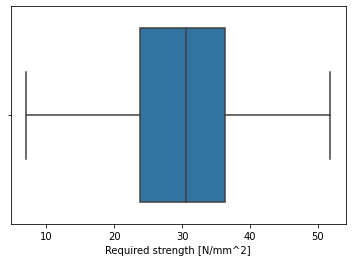

In [3]:
# Required_strength
sns.boxplot(Y_Required_strength, x=samples)
plt.xlabel('Required strength [N/mm^2]')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


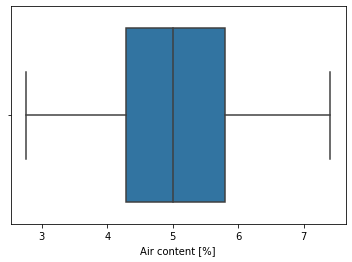

In [4]:
# Maximum_size_ca
sns.boxplot(Y_Air_content, x=samples)
plt.xlabel('Air content [%]')

plt.show()

In [5]:
def F_W_C_ratio(Required_strength, overdesign_factor=0.65):
    '''
    水セメント比計算公式
    From 「Standard Spesifications for Concrete Structures 2007」
    '''
    W_C_ratio =  25.4 /  (Required_strength + 13.1) * overdesign_factor
    return W_C_ratio

def F_Sand_per_Water_content(Maximum_size_ca):
    '''
    Approximate values of the unit bulk bolume of coares aggregate, 
    sand percentage and water content of concrete.
    From 「Standard Spesifications for Concrete Structures 2007」(Table C4.5.2))
    '''
    M = Maximum_size_ca
    if M == 0:
        return [48, 170, 7.0] #[Sand_percentage, Water_content, Theory_Air_content]
    if M == 1:
        return [45, 165, 6.5]
    if M == 2:
        return [43, 160, 5.0]
    if M == 3:
        return [40, 155, 4.5]

def Correction(W_C_ratio, Air_content, Theory_Air_content, Slump):
    '''
    Approximate amounts of correction for the sand percentage and water content
    due to cariations in the quality of materials used of concrete.
    From 「Standard Spesifications for Concrete Structures 2007」(Table C4.5.3))
    '''
    correction_Sand_percentage =  (W_C_ratio - 0.55)/0.05
    correction_Sand_percentage = correction_Sand_percentage + -1.0*(Air_content - Theory_Air_content)

    correction_Water_content = (Slump- 8)*-3.0
    correction_Water_content = correction_Water_content + -3.0*(Air_content - Theory_Air_content)

    return [correction_Sand_percentage, correction_Water_content]

def Final_Calculation(Required_strength, Maximum_size_ca, Slump, Air_content):
    '''
    Final calculation
    '''
    W_C_ratio = F_W_C_ratio(Required_strength)
    [Sand_percentage, Water_content, Theory_Air_content] = F_Sand_per_Water_content(Maximum_size_ca)
    [correction_Sand_percentage, correction_Water_content] = Correction(W_C_ratio, 
                                                                               Air_content, Theory_Air_content, Slump)
    Sand_percentage = Sand_percentage + correction_Sand_percentage
    Water_content = (100 + correction_Water_content)/100 * Water_content
    Cement_content = Water_content/W_C_ratio
    Water_volume = Water_content/1.0
    Cement_volume = Cement_content/3.14
    Air_volume = 10*Air_content
    Aggregate_volume = 1000 - Water_volume - Cement_volume - Air_volume
    Fine_Aggregate_content = Aggregate_volume * Sand_percentage/100 * 2.55
    Coarse_Aggregate_content = Aggregate_volume * (1 - Sand_percentage/100) * 2.68

    return [Water_content, Cement_content, Fine_Aggregate_content, Coarse_Aggregate_content]

In [6]:
# データの作成
X_Water_content = []
X_Cement_content = []
X_Fine_Aggregate_content = []
X_Coarse_Aggregate_content = []

for (n_Required_strength, n_Maximum_size_ca, n_Slump, n_Air_content) in data_input:
    [Water_content, Cement_content, Fine_Aggregate_content, Coarse_Aggregate_content] = Final_Calculation(n_Required_strength, n_Maximum_size_ca, n_Slump, n_Air_content)
    X_Water_content.append(Water_content)
    X_Cement_content.append(Cement_content)
    X_Fine_Aggregate_content.append(Fine_Aggregate_content)
    X_Coarse_Aggregate_content.append(Coarse_Aggregate_content)

In [7]:
samples = 5
for sample in np.random.randint(1, N, samples):
    print('sample X {}: '.format(sample), X_Water_content[sample], X_Cement_content[sample], X_Fine_Aggregate_content[sample], X_Coarse_Aggregate_content[sample])
    print('Y:', Y_Required_strength[sample], Y_Slump[sample])
    print('*********************************************')

sample X 95:  152.04358859829205 404.0381153196795 693.0185823493467 1025.3108354658843
Y: 30.773400683485594 10.624337913372916
*********************************************
sample X 22:  100.93684014217055 318.61992698418806 845.4911115023802 1098.4376462278224
Y: 39.01590720592796 22.92560501081228
*********************************************
sample X 69:  173.09482294082656 305.4587528444156 841.3066196271209 909.419396322965
Y: 16.035036645118623 8.356616046101164
*********************************************
sample X 68:  138.70704249364059 545.7189908750103 719.1963659140571 955.1315273803599
Y: 51.85575406533161 16.22917911861051
*********************************************
sample X 49:  160.23897126928435 478.2131783975383 595.4459160139667 1047.6239898311974
Y: 36.17203109707419 6.645098120676889
*********************************************


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


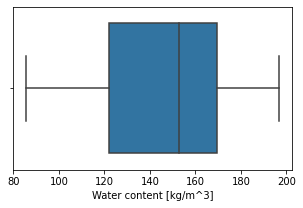

In [8]:
plt.figure(figsize=(5,3))
#plt.title('Water content')
plt.xlabel('Water content [kg/m^3]')
sns.boxplot(X_Water_content, x=samples)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


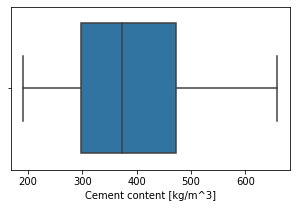

In [9]:
plt.figure(figsize=(5,3))
#plt.title('Cement content')
plt.xlabel('Cement content [kg/m^3]')
sns.boxplot(X_Cement_content, x=samples)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


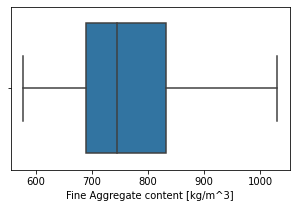

In [10]:
plt.figure(figsize=(5,3))
#plt.title('Fine Aggregate content')
plt.xlabel('Fine Aggregate content [kg/m^3]')
sns.boxplot(X_Fine_Aggregate_content, x=samples)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


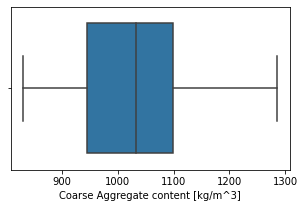

In [11]:
plt.figure(figsize=(5,3))
#plt.title('Coarse Aggregate content')
plt.xlabel('Coarse Aggregate content [kg/m^3]')
sns.boxplot(X_Coarse_Aggregate_content, x=samples)
plt.show()

# 02モデルの訓練

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# 偏差の追加
Y_Required_strength += np.random.normal(5, 1, N)
Y_Slump += np.random.normal(3, 1, N)

# 入力値，出力値の作成
X = np.array([X_Water_content,
    X_Cement_content,
    X_Fine_Aggregate_content,
    X_Coarse_Aggregate_content,
    X_Maximum_size_ca
]).T

Y_strength = np.array([
              Y_Required_strength
    ]).T

Y_slump = np.array([
              Y_Slump
    ]).T

name_list = ['Water content','Cement content','Fine Aggregate content','Coarse Aggregate content', 'Maximum size ca']

In [14]:
# 訓練用データとテスト用データの配分
X_train, X_test, Y_train_strength, Y_test_strength = train_test_split(X, Y_strength, test_size=0.2, random_state=42)
X_train, X_test, Y_train_slump, Y_test_slump = train_test_split(X, Y_slump, test_size=0.2, random_state=42)

print('Train number: ', len(X_train))
print('Test number: ', len(X_test))
print('Train dataset shape= ', X_train.shape)
print('Test dataset shape= ', Y_test_strength.shape)

Train number:  80
Test number:  20
Train dataset shape=  (80, 5)
Test dataset shape=  (20, 1)


## Strength

In [15]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [16]:
# For slump prediction
reg_strength = make_pipeline(StandardScaler(),
                    LinearRegression()
                     #RandomForestRegressor(max_depth=20, random_state=0)
#                     SGDRegressor(max_iter=1000, tol=1e-4)
                     )
reg_strength.fit(X_train, Y_train_strength)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [17]:
print('Strength test score= ', reg_strength.score(X_test, Y_test_strength))
print('*****************************************')

samples = 5
for sample in np.random.randint(1, len(X_test), samples):
    print('sample ', str(sample), ': y true= ', Y_test_strength[sample][0], 
          ', y predict= ', reg_strength.predict(X_test)[sample])

Strength test score=  0.9285825304009726
*****************************************
sample  6 : y true=  44.78979121670898 , y predict=  [41.37473403]
sample  12 : y true=  43.034074091892464 , y predict=  [45.18138437]
sample  13 : y true=  26.80528635062364 , y predict=  [26.43992363]
sample  9 : y true=  50.929666692966904 , y predict=  [50.80493177]
sample  10 : y true=  33.958540418056266 , y predict=  [35.61056385]


回帰式の係数
[35.15875488]
[[-7.34226    11.09031603 -0.47814372  1.00712534 -0.95943068]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  import sys


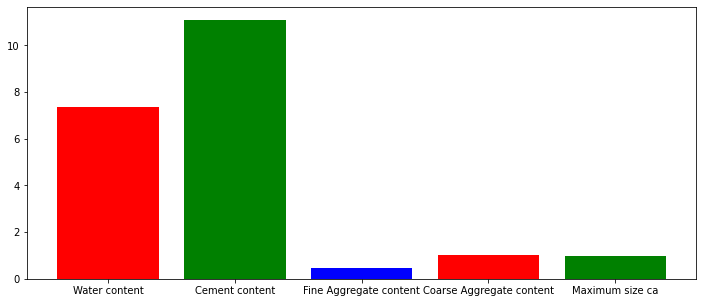

In [23]:
print("回帰式の係数")
print(reg_strength[1].intercept_) 
print(reg_strength[1].coef_) 


plt.figure(figsize=(12,5))
plt.bar(range(len(reg_strength[1].coef_[0])), abs(reg_strength[1].coef_[0]),color='rgb',tick_label=name_list)
plt.show()

## Slump

In [19]:
# For slump prediction
reg_slump = make_pipeline(StandardScaler(),
                    LinearRegression()
                     #RandomForestRegressor(max_depth=20, random_state=0)
#                     SGDRegressor(max_iter=1000, tol=1e-4)
                     )
reg_slump.fit(X_train, Y_train_slump)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [20]:
print('Slump test score= ', reg_slump.score(X_test, Y_test_slump))
print('*****************************************')

samples = 5
for sample in np.random.randint(1, len(X_test), samples):
    print('sample', str(sample), ': y true= ', Y_test_slump[sample][0], 
          ', y predict= ', reg_slump.predict(X_test)[sample])

Slump test score=  0.9707495363913412
*****************************************
sample 12 : y true=  7.81524564471782 , y predict=  [7.82395891]
sample 6 : y true=  24.742766185484264 , y predict=  [26.53221991]
sample 16 : y true=  25.909641984740652 , y predict=  [26.58622085]
sample 1 : y true=  15.55542740472632 , y predict=  [15.17448615]
sample 17 : y true=  22.327625524437522 , y predict=  [24.18601878]


回帰式の係数
[15.56026967]
[[-2.20100429  3.90544191  4.33720479  5.10604293 -2.04683793]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  


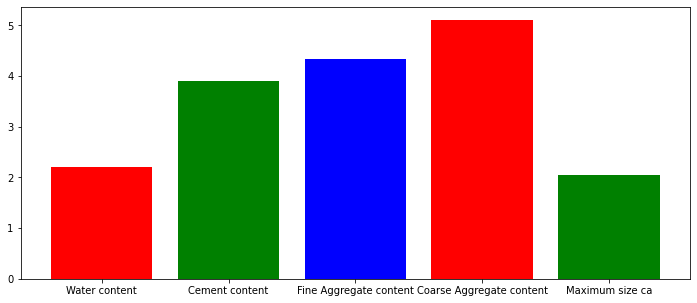

In [24]:
print("回帰式の係数")
print(reg_slump[1].intercept_) 
print(reg_slump[1].coef_) 

plt.figure(figsize=(12,5))
plt.bar(range(len(reg_slump[1].coef_[0])), abs(reg_slump[1].coef_[0]),color='rgb',tick_label=name_list)
plt.show()

# サンプル数の影響

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)


from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

def F_W_C_ratio(Required_strength, overdesign_factor=0.65):
    '''
    水セメント比計算公式
    From 「Standard Spesifications for Concrete Structures 2007」
    '''
    W_C_ratio =  25.4 /  (Required_strength + 13.1) * overdesign_factor
    return W_C_ratio

def F_Sand_per_Water_content(Maximum_size_ca):
    '''
    Approximate values of the unit bulk bolume of coares aggregate, 
    sand percentage and water content of concrete.
    From 「Standard Spesifications for Concrete Structures 2007」(Table C4.5.2))
    '''
    M = Maximum_size_ca
    if M == 0:
        return [48, 170, 7.0] #[Sand_percentage, Water_content, Theory_Air_content]
    if M == 1:
        return [45, 165, 6.5]
    if M == 2:
        return [43, 160, 5.0]
    if M == 3:
        return [40, 155, 4.5]

def Correction(W_C_ratio, Air_content, Theory_Air_content, Slump):
    '''
    Approximate amounts of correction for the sand percentage and water content
    due to cariations in the quality of materials used of concrete.
    From 「Standard Spesifications for Concrete Structures 2007」(Table C4.5.3))
    '''
    correction_Sand_percentage =  (W_C_ratio - 0.55)/0.05
    correction_Sand_percentage = correction_Sand_percentage + -1.0*(Air_content - Theory_Air_content)

    correction_Water_content = (Slump- 8)*-3.0
    correction_Water_content = correction_Water_content + -3.0*(Air_content - Theory_Air_content)

    return [correction_Sand_percentage, correction_Water_content]

def Final_Calculation(Required_strength, Maximum_size_ca, Slump, Air_content):
    '''
    Final calculation
    '''
    W_C_ratio = F_W_C_ratio(Required_strength)
    [Sand_percentage, Water_content, Theory_Air_content] = F_Sand_per_Water_content(Maximum_size_ca)
    [correction_Sand_percentage, correction_Water_content] = Correction(W_C_ratio, 
                                                                               Air_content, Theory_Air_content, Slump)
    Sand_percentage = Sand_percentage + correction_Sand_percentage
    Water_content = (100 + correction_Water_content)/100 * Water_content
    Cement_content = Water_content/W_C_ratio
    Water_volume = Water_content/1.0
    Cement_volume = Cement_content/3.14
    Air_volume = 10*Air_content
    Aggregate_volume = 1000 - Water_volume - Cement_volume - Air_volume
    Fine_Aggregate_content = Aggregate_volume * Sand_percentage/100 * 2.55
    Coarse_Aggregate_content = Aggregate_volume * (1 - Sand_percentage/100) * 2.68

    return [Water_content, Cement_content, Fine_Aggregate_content, Coarse_Aggregate_content]

In [2]:
def main(N):
    N = N # サンプル数(変更可能)

    Y_Required_strength = np.random.normal(30, 10, N) # Required_strength, 平均値=40, 分散=10の正規分布
    X_Maximum_size_ca = np.random.randint(0, 3, size=N) # 粗骨材の最大粒径 0 = 15[mm], 1 = 20[mm], 2 = 25[mm], 3 = 40[mm]　示方配合書から
    Y_Slump = np.random.uniform(5, 25, size=N)  # Slumpは[5, 25]のランダム数
    # 普通コンクリート 「8, 10, 12, 15, 18, 21cm 」, 軽量コンクリート 「8, 10, 12, 15, 18, 21cm 」, 高強度コンクリート 「12, 15, 18, 21cm」
    Y_Air_content = np.random.normal(5, 1, N) # Air_content, 平均値=5, 分散=1の正規分布

    data_input = zip(Y_Required_strength, X_Maximum_size_ca, Y_Slump, Y_Air_content)
    # データの作成
    X_Water_content = []
    X_Cement_content = []
    X_Fine_Aggregate_content = []
    X_Coarse_Aggregate_content = []

    for (n_Required_strength, n_Maximum_size_ca, n_Slump, n_Air_content) in data_input:
        [Water_content, Cement_content, Fine_Aggregate_content, Coarse_Aggregate_content] = Final_Calculation(n_Required_strength, n_Maximum_size_ca, n_Slump, n_Air_content)
        X_Water_content.append(Water_content)
        X_Cement_content.append(Cement_content)
        X_Fine_Aggregate_content.append(Fine_Aggregate_content)
        X_Coarse_Aggregate_content.append(Coarse_Aggregate_content)
    
    # 偏差の追加
    Y_Required_strength += np.random.normal(5, 1, N)
    Y_Slump += np.random.normal(3, 1, N)

# 入力値，出力値の作成
    X = np.array([X_Water_content,
                  X_Cement_content,
                  X_Fine_Aggregate_content,
                  X_Coarse_Aggregate_content,
                  X_Maximum_size_ca
                  ]).T

    Y_strength = np.array([
              Y_Required_strength
              ]).T

    Y_slump = np.array([
              Y_Slump
              ]).T

    
    # 訓練用データとテスト用データの配分
    X_train, X_test, Y_train_strength, Y_test_strength = train_test_split(X, Y_strength, test_size=0.2, random_state=42)
    X_train, X_test, Y_train_slump, Y_test_slump = train_test_split(X, Y_slump, test_size=0.2, random_state=42)
    

# For strength prediction
    number_strength = make_pipeline(StandardScaler(), # データを標準化する
                     LinearRegression()
#                    RandomForestRegressor(max_depth=50, random_state=0) # RandomForest回帰
#                     SGDRegressor(max_iter=1000, tol=1e-3)
                     ) # SGD回帰
    number_strength.fit(X_train, Y_train_strength)
    
#    print('Strength test score= ', reg_strength.score(X_test, Y_test_strength))
    number_slump = make_pipeline(StandardScaler(),
                    LinearRegression()
#                     RandomForestRegressor(max_depth=20, random_state=0)
#                     SGDRegressor(max_iter=1000, tol=1e-4)
                     )
    number_slump.fit(X_train, Y_train_slump)
#    print('Slump test score= ', reg_slump.score(X_test, Y_test_slump))
    
    return [number_strength.score(X_test, Y_test_strength),
            number_slump.score(X_test, Y_test_slump)]


number_list = []
Strength_list = []
Slump_list = []
for i in range(10,201):
    number_list.append(i)
    [Strength_, Slump_] = main(i)
    Strength_list.append(Strength_)
    Slump_list.append(Slump_)

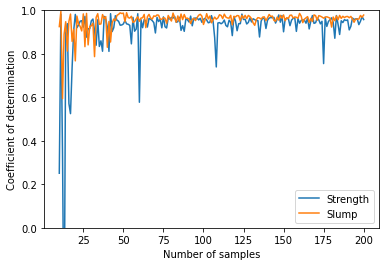

In [3]:
plt.plot(number_list, Strength_list, label='Strength')
plt.plot(number_list, Slump_list, label='Slump')
plt.xlabel('Number of samples')
plt.ylabel('Coefficient of determination')


plt.ylim([0, 1])
plt.legend()
plt.show()